In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit
import pickle
import gzip

In [6]:
def load_data_from_gzip_pickle(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# Example usage:
# data = load_data_from_gzip_pickle('path_to_your_file.pkl.gz')

In [7]:
training_results_folder_path = 'training_results/'

In [8]:
reward_method = "CAFE"

In [9]:
file_path = training_results_folder_path + "results_cafe-reward_cnot-gate_6-qubits_0.05-gamma.pickle.gz"
cafe = load_data_from_gzip_pickle(file_path)


In [10]:
reward = cafe["training_results"]["avg_reward"]
fidelities = cafe["training_results"]["fidelity_history"]

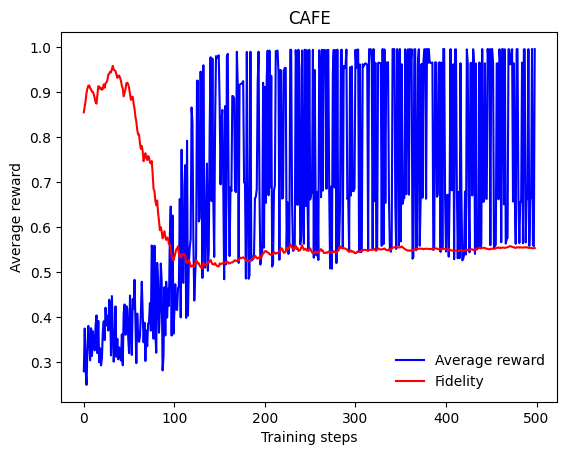

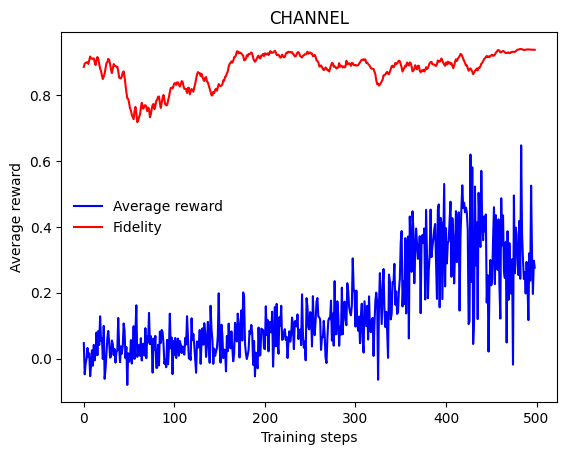

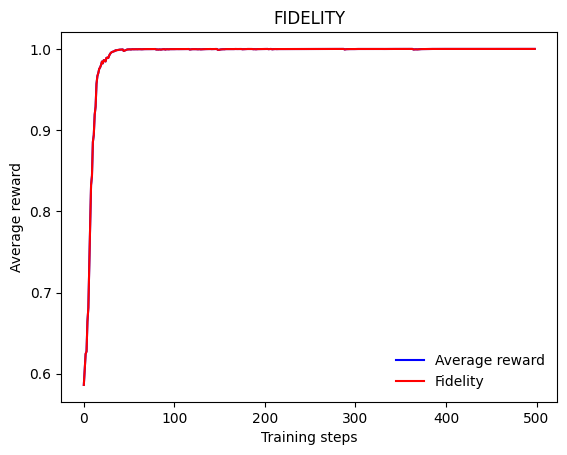

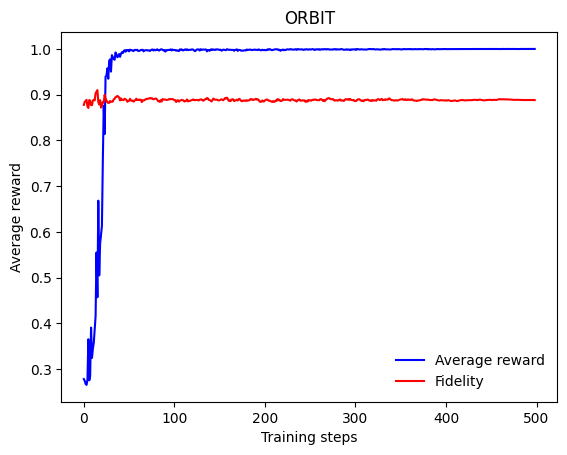

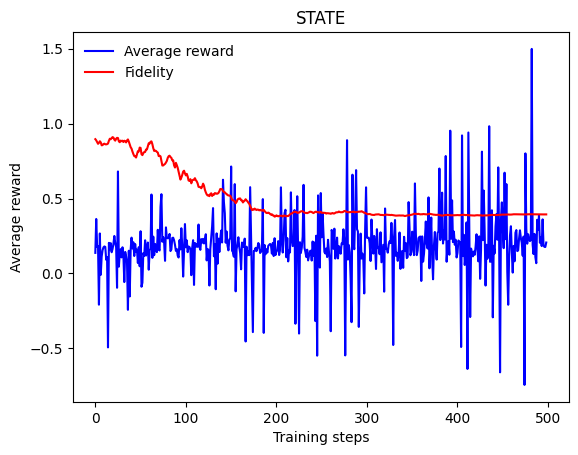

In [27]:
def plot_reward_and_fidelity(reward, fidelities, reward_method):
    plt.figure()
    plt.plot(reward, color='blue')
    plt.plot(fidelities, color='red')
    plt.xlabel('Training steps')
    plt.ylabel('Average reward')
    plt.title(f'{reward_method.upper()}')
    plt.legend(['Average reward', 'Fidelity'], frameon=False)

reward_methods = ["cafe", "channel", "fidelity", "orbit", "state"]
paths_training_results = [
    training_results_folder_path + f"results_{reward_method}-reward_cnot-gate_6-qubits_0.05-gamma.pickle.gz" for reward_method in reward_methods
]

for path, reward_method in zip(paths_training_results, reward_methods):
    data = load_data_from_gzip_pickle(path)
    reward = data["training_results"]["avg_reward"]
    fidelities = data["training_results"]["fidelity_history"]
    plot_reward_and_fidelity(reward, fidelities, reward_method)

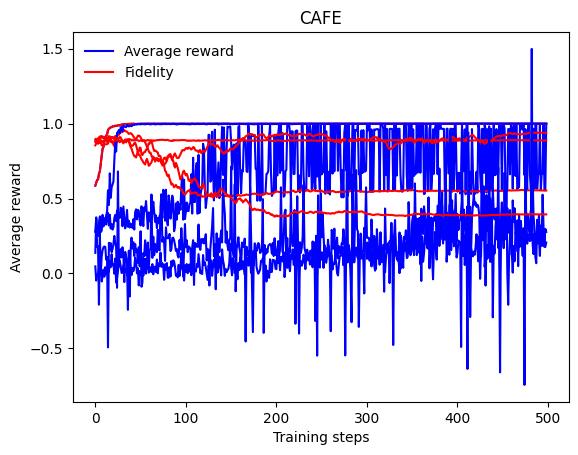